In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Data/Housing - Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
enc = OrdinalEncoder()

In [6]:
df["mainroad"] = enc.fit_transform(df[["mainroad"]])
df["guestroom"] = enc.fit_transform(df[["guestroom"]])
df["basement"] = enc.fit_transform(df[["basement"]])
df["hotwaterheating"] = enc.fit_transform(df[["hotwaterheating"]])
df["airconditioning"] = enc.fit_transform(df[["airconditioning"]])
df["prefarea"] = enc.fit_transform(df[["prefarea"]])

In [7]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
rank_order = ["unfurnished", "semi-furnished", "furnished"]
oe = OrdinalEncoder(categories=[rank_order])
df["furnishingstatus"] = enc.fit_transform(df[["furnishingstatus"]])

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


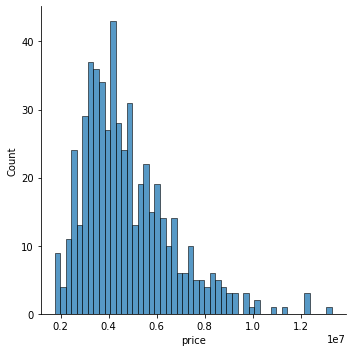

In [25]:
sns.displot(df["price"], bins=50)

In [11]:
corr = df.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

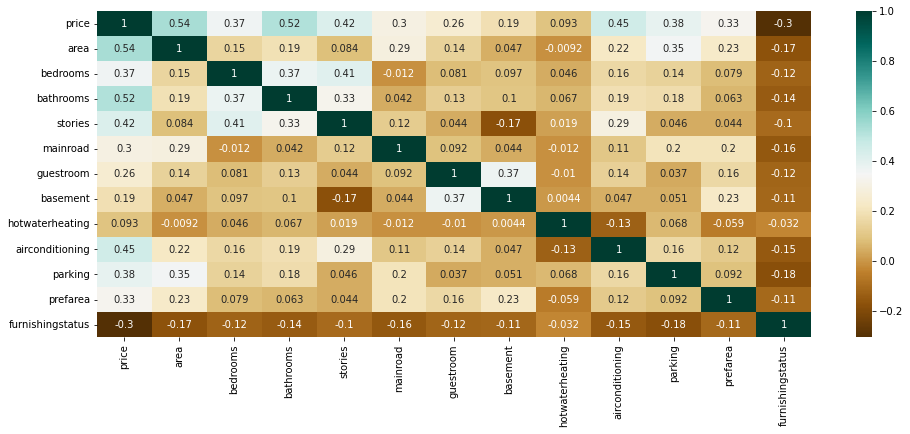

In [13]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="BrBG")

Text(0.5, 1.0, 'Features Correlating with Price')

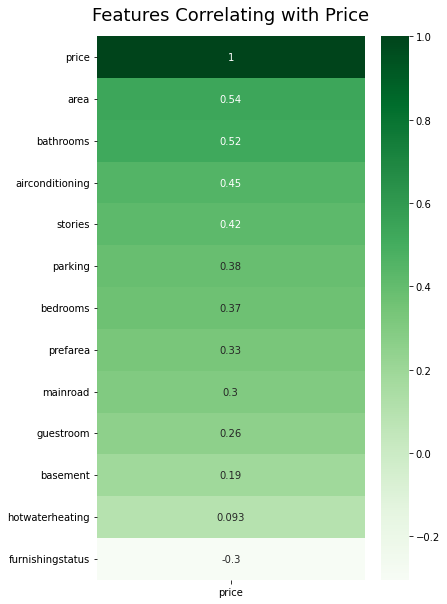

In [21]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(corr[["price"]].sort_values(by="price", ascending=False), annot=True, cmap="Greens")
heatmap.set_title("Features Correlating with Price", fontdict={"fontsize":18}, pad=16)

In [23]:
x = df.drop(['price'], axis=1)
y = df['price']

print(x.shape)
print(y.shape)

(545, 12)
(545,)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [30]:
x_train

array([[0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01278351, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.21477663, 0.6       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.12714777, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.1862543 , 0.6       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41580756, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(x_test)
y_pred

array([5471435.30719379, 5470372.25933389, 6847752.25794967,
       4236237.02215711, 3705348.8808248 , 2955243.58822528,
       5153695.15104086, 4806603.11074915, 6962985.17222412,
       3125310.89723514, 5104578.66313189, 2979658.95015922,
       7130606.84872747, 3793858.40116431, 4110635.59397106,
       2128119.67341574, 3455890.39083395, 5801843.89388394,
       3752557.6939695 , 2505007.92941488, 3163968.75647427,
       2537637.80497647, 5074466.49090736, 2133474.06895903,
       5562144.49406203, 3350929.49154533, 3992562.88819794,
       5284302.10087681, 7156664.25339774, 6670715.87820502,
       5728530.42169502, 5067177.87622917, 4453561.55446466,
       4754992.43326747, 3317586.52743642, 7945000.64726419,
       5022867.88363703, 3855339.77921746, 4960119.7831287 ,
       7241268.78486153, 4047758.6584919 , 3322089.82072148,
       6882139.7383498 , 3161808.0452526 , 6954360.9033315 ,
       4802006.13119054, 2878686.21837179, 2459222.59080982,
       5670871.96687162,

In [35]:
y_test

91     6419000
184    5110000
18     8890000
490    2835000
182    5145000
        ...   
249    4543000
438    3255000
506    2604000
370    3640000
210    4900000
Name: price, Length: 109, dtype: int64

In [37]:
r2 = r2_score(y_pred, y_test)
r2

0.5411741461982325

In [43]:
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1206793237591.3967
1098541.4136897146


In [39]:
mae = mean_absolute_error(y_pred, y_test)
mae

844123.695444331